<a href="https://colab.research.google.com/github/BetriuJaume/SMDS/blob/main/Copy_of_SMDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
data=pd.read_csv('State_house_prices_ts.csv',sep=';')

We can see that there are some states that don't have any data on some types of houses or in speciffic dates.

In [ ]:
data['RegionName'].value_counts() #The maximum is 261 so we will use one of this states

Alabama               261
Missouri              261
Nevada                261
Arizona               261
NewJersey             261
NewMexico             261
NewYork               261
NorthCarolina         261
Ohio                  261
Oklahoma              261
Oregon                261
Pennsylvania          261
RhodeIsland           261
SouthCarolina         261
Tennessee             261
Texas                 261
Utah                  261
Virginia              261
Washington            261
WestVirginia          261
Wisconsin             261
Nebraska              261
NewHampshire          261
Mississippi           261
Illinois              261
Arkansas              261
California            261
Colorado              261
Connecticut           261
Delaware              261
Florida               261
Minnesota             261
Hawaii                261
Idaho                 261
Georgia               261
Indiana               261
Maine                 261
Iowa                  261
Massachusett

For example for states North Dakota and Columbia we have a lot of dates missing

#Exploration of the data
Let's explore the data simply by ploting the price of every house type on every state to get a general idea of what is happening:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


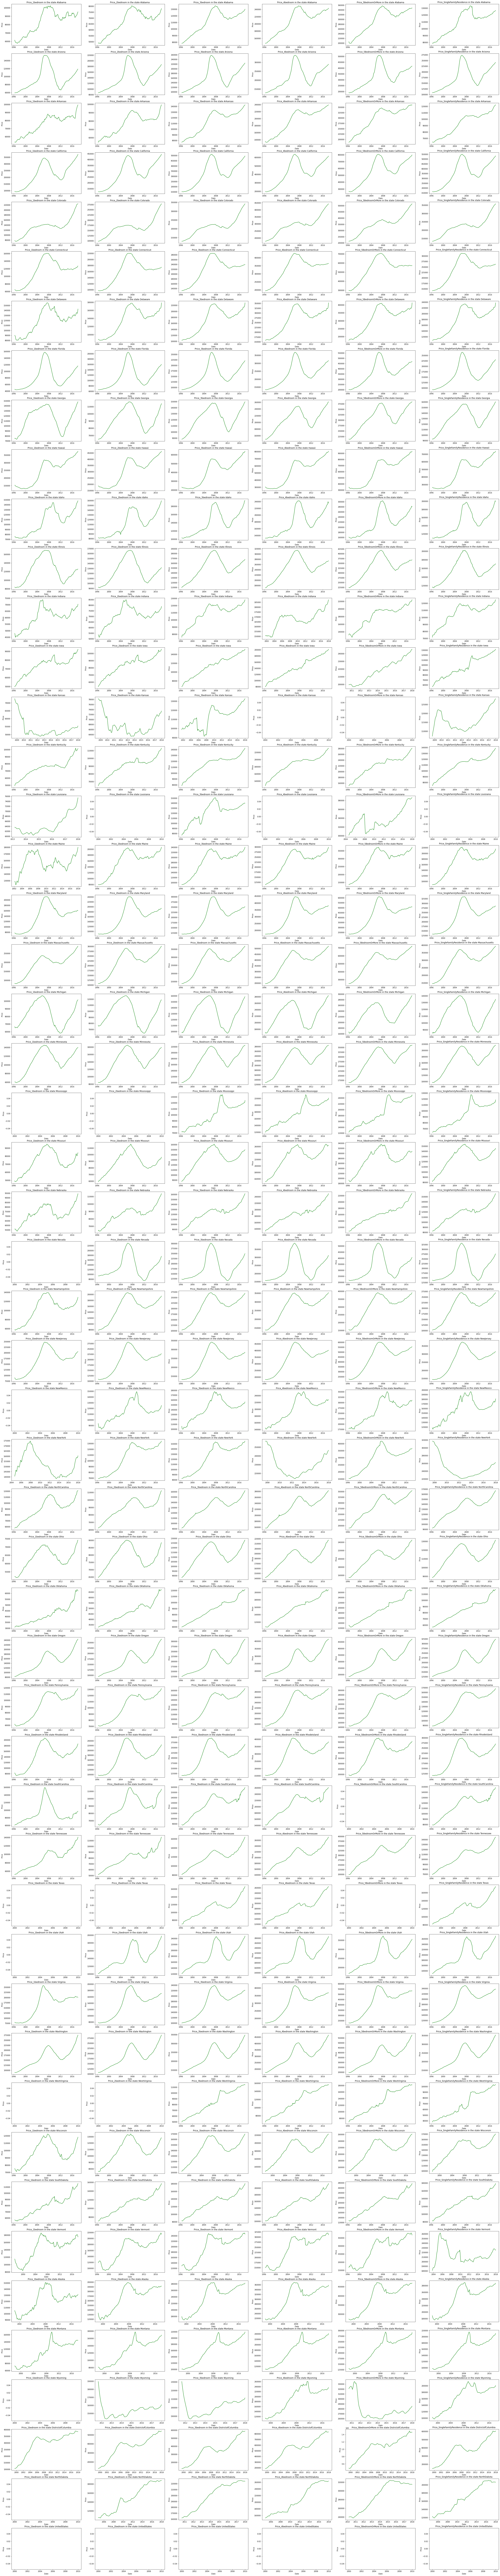

In [ ]:
list_of_data_states=[]
for state in data['RegionName'].unique()[1:]:
  data_state=data[data['RegionName']==state]
  data_state['Date']=pd.to_datetime(data_state['Date'])
  data_state=data_state.set_index('Date')
  data_state=data_state.drop('RegionName',axis=1)
  list_of_data_states.append(data_state)

region_names=data['RegionName'].unique()[1:]
house_types=data.columns[2:]

fig, ax = plt.subplots(len(region_names),len(house_types),figsize=(50,270));
for i in range(len(region_names)):
  for j in range(len(house_types)):
    ax[i,j].plot(list_of_data_states[i].iloc[:,j],color='green')
    ax[i,j].set(xlabel='Date',ylabel='Price',title=house_types[j]+' in the state '+region_names[i])

* First thing we notice is that there are some blank-plots. This is caused because we have some missing data from home-types of some states like the case of Misissippi.
* The second thing that caches our attention is that a lot of the plots seem to have a peak arround the years 2004, 2005 and 2006 and then a plummeting.
* This fenomena was caused by the **United States housing bubble** that exploded arround the years 2004, 2005 and early 2006 and the prices of property deacreased during 2006 and 2007 reaching new lows in 2012.
* Although, there are some exceptions like the state of Iowa or Oklahoma or Iowa that seem to have resisted this crisis reciving minimal impact. We will take a closer look into this cases.


#Most expensive and cheapest states
* An interesting fact about the data could be to see witch states have the highest property price and wich ones have the lowest prices.
* To do it we will use the most actual price (Date 31/12/17) in the timeline and for every state the price will simply be the mean of the six types of properties.

Let's take a look at the data:

In [40]:
data_recent=data[data['Date']=='31/12/17']
data_recent

Date  ... Price_SingleFamilyResidence
13162  31/12/17  ...                    126600.0
13163  31/12/17  ...                    287400.0
13164  31/12/17  ...                    241300.0
13165  31/12/17  ...                    122400.0
13166  31/12/17  ...                    531900.0
13167  31/12/17  ...                    357300.0
13168  31/12/17  ...                    262100.0
13169  31/12/17  ...                    237400.0
13170  31/12/17  ...                    603600.0
13171  31/12/17  ...                    230300.0
13172  31/12/17  ...                    160400.0
13173  31/12/17  ...                    737500.0
13174  31/12/17  ...                    199500.0
13175  31/12/17  ...                    170600.0
13176  31/12/17  ...                    125100.0
13177  31/12/17  ...                    131700.0
13178  31/12/17  ...                    128200.0
13179  31/12/17  ...                    138800.0
13180  31/12/17  ...                         NaN
13181  31/12/17  ...                    215500.0
13182  31/12/17  ...                    285000.0
13183  31/12/17  ...                    392900.0
13184  31/12/17  ...                    134800.0
13185  31/12/17  ...                    216700.0
13186  31/12/17  ...                    118500.0
13187  31/12/17  ...                    145600.0
13188  31/12/17  ...                    210500.0
13189  31/12/17  ...                    156000.0
13190  31/12/17  ...                    276000.0
13191  31/12/17  ...                    269400.0
13192  31/12/17  ...                    314900.0
13193  31/12/17  ...                    181000.0
13194  31/12/17  ...                    261900.0
13195  31/12/17  ...                    167000.0
13196  31/12/17  ...                    206200.0
13197  31/12/17  ...                    131500.0
13198  31/12/17  ...                    117400.0
13199  31/12/17  ...                    324200.0
13200  31/12/17  ...                    168100.0
13201  31/12/17  ...                    270100.0
13202  31/12/17  ...                    148600.0
13203  31/12/17  ...                    178700.0
13204  31/12/17  ...                    145000.0
13205  31/12/17  ...                    175000.0
13206  31/12/17  ...                    270600.0
13207  31/12/17  ...                    224700.0
13208  31/12/17  ...                    237300.0
13209  31/12/17  ...                    352800.0
13210  31/12/17  ...                    103300.0
13211  31/12/17  ...                    170200.0
13212  31/12/17  ...                    200500.0

[51 rows x 8 columns]

* First we notice we have some NaN in the rows so we will interpolate them.
* We will see what tendency does the price follow to choose the interpolation method that best fits our case
* Obiously we will observe the cases where we have NaN values like in the states of West Virginia, Utah, Texas or New Mexico.
* We will not consider the single family house price because it won't fit into the linear model we want to design

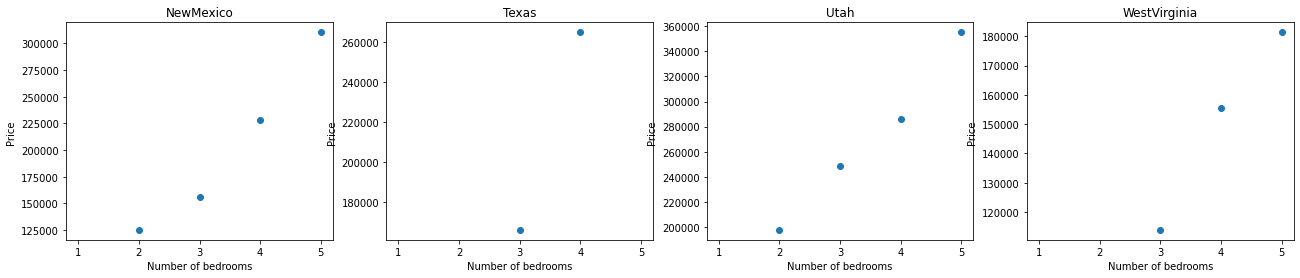

In [55]:
data_Nans=data_recent[(data_recent['RegionName']=='WestVirginia') | (data_recent['RegionName']=='Utah') | (data_recent['RegionName']=='Texas') | (data_recent['RegionName']=='NewMexico')]
states_interpolation=data_Nans['RegionName']
data_Nans=data_Nans.T.drop(['Date','RegionName','Price_SingleFamilyResidence'])
fig, ax=plt.subplots(1,4,figsize=(22,4))
for j in range(len(data_Nans.columns)):
  ax[j].scatter([1,2,3,4,5],data_Nans.iloc[:,j])
  ax[j].set(xlabel='Number of bedrooms',ylabel='Price ',title=states_interpolation.iloc[j])

* We can notice a clear linearity beween the price of the properties and the number of beedrooms they have.
* The only case where the relation seems to be a little bit quadratic is in the case of New Mexico but we will stick to the linear interpolation for the sake of simplicity.
* So we will use Linear Regression for the interpolation.


In [ ]:
#HERE WE DO THE REGRESION

In [86]:
interpolated_data=data_recent.drop(['Date','RegionName','Price_SingleFamilyResidence'],axis=1).interpolate(method='linear',axis=0)
interpolated_data.insert(0,column='RegionName',value=data_recent['RegionName'])
interpolated_data.insert(0,column='Date',value=data_recent['Date'])
interpolated_data.insert(7,column='Price_SingleFamilyResidence',value=data_recent['Price_SingleFamilyResidence'])

In [87]:
interpolated_data[interpolated_data['RegionName']=='NewMexico']

Date RegionName  ...  Price_5BedroomOrMore  Price_SingleFamilyResidence
13193  31/12/17  NewMexico  ...              310500.0                     181000.0

[1 rows x 8 columns]

In [89]:
interpolated_data[interpolated_data['RegionName']=='WestVirginia']

Date  ... Price_SingleFamilyResidence
13210  31/12/17  ...                    103300.0

[1 rows x 8 columns]

#Iowa
Let's take a more closer look to the prices in the state of Iowa

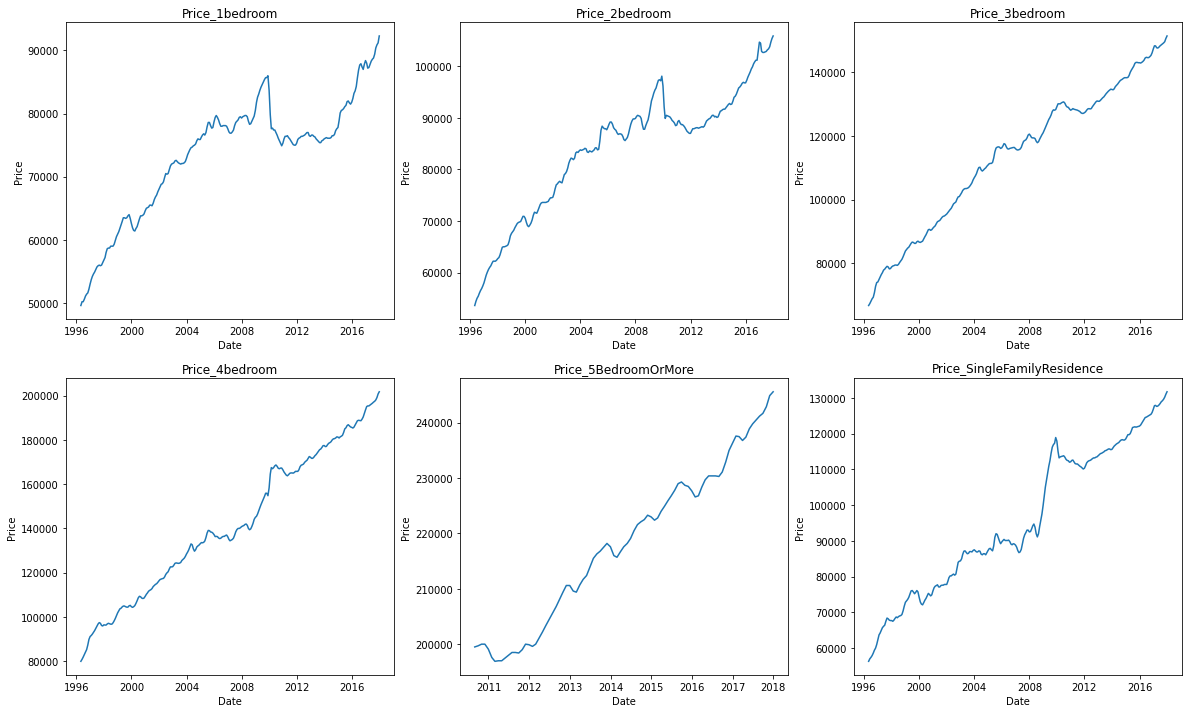

In [ ]:
data_Iowa=data[data['RegionName']=='Iowa'].drop('RegionName',axis=1)
data_Iowa['Date']=pd.to_datetime(data_Iowa['Date'])
data_Iowa=data_Iowa.set_index('Date')


fig, ax=plt.subplots(2,3,figsize=(20,12))
for i in range(2):
  for j in range(3):
    if(i==0):
      ax[i,j].plot(data_Iowa.iloc[:,j])
      ax[i,j].set(xlabel='Date',ylabel='Price',title=house_types[j])
    if(i==1):
      ax[i,j].plot(data_Iowa.iloc[:,3+j])
      ax[i,j].set(xlabel='Date',ylabel='Price',title=house_types[3+j])  

* As we already said Iowa was not that affected by the burst of the bubble even with an increase of the price in some types of properties like 4-bedroom ones during the years that the prices plummeted in other states.
* AQUI POTS PARLAR DE MERDES DE TENDENCIES I SEASONALITY!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [34]:
data

Date  ... Price_SingleFamilyResidence
0           NaN  ...                         NaN
1      30/04/96  ...                     79000.0
2      30/04/96  ...                    107500.0
3      30/04/96  ...                     64500.0
4      30/04/96  ...                    162000.0
...         ...  ...                         ...
13208  31/12/17  ...                    237300.0
13209  31/12/17  ...                    352800.0
13210  31/12/17  ...                    103300.0
13211  31/12/17  ...                    170200.0
13212  31/12/17  ...                    200500.0

[13213 rows x 8 columns]